В цьому проєкті я побудую рішення задачі логістичної регресії і створю submission на змагання на Kaggle.
У проєкті я завантажив дані `train.csv`, `test.csv`, `sample_submission.csv` зі змагання на Kaggle ["Bank Customer Churn Prediction (DLU Course)"](https://www.kaggle.com/t/7c080c5d8ec64364a93cf4e8f880b6a0). Для завантаження потрібно долучитись до змагання (натиснути кнопку "Join").

Для зручності і бажання перевірити виконання коду я закоментую завантаження та логін з Kaggle і виконаю код з локальним завантаженням файлів.

1. Зчитую дані `train.csv` в pandas dataframe та розбиваю їх на train і validation піднабори.

In [ ]:
!pip install opendatasets --upgrade --quiet

In [ ]:
import opendatasets as od
import os
import pandas as pd
import numpy as np

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#dataset_url = 'https://www.kaggle.com/competitions/bank-customer-churn-prediction-dlu'
#od.download(dataset_url)

In [ ]:
#data_dir = '/content/bank-customer-churn-prediction-dlu'

In [ ]:
#cd bank-customer-churn-prediction-dlu/

In [ ]:
#ls

In [ ]:
bank_df = pd.read_csv('train.csv')
bank_df

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15779985.0,Nwankwo,678.0,France,Male,29.0,4.0,0.00,3.0,1.0,0.0,180626.36,0.0
1,1,15650086.0,Ch'in,687.0,France,Female,34.0,1.0,0.00,2.0,0.0,1.0,63736.17,0.0
2,2,15733602.0,Thompson,682.0,France,Female,52.0,6.0,0.00,3.0,0.0,0.0,179655.87,1.0
3,3,15645794.0,Macleod,753.0,Germany,Male,44.0,6.0,83347.25,2.0,1.0,0.0,161407.48,0.0
4,4,15633840.0,Hsia,544.0,Germany,Female,55.0,0.0,107747.57,1.0,1.0,0.0,176580.86,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14995,14995,15807989.0,Ch'iu,585.0,France,Male,33.0,3.0,0.00,1.0,1.0,0.0,54191.38,0.0
14996,14996,15731781.0,Ch'ang,678.0,France,Male,34.0,6.0,0.00,2.0,1.0,1.0,53437.10,0.0
14997,14997,15667093.0,Goliwe,678.0,France,Female,54.0,4.0,0.00,1.0,1.0,0.0,147720.29,1.0
14998,14998,15732644.0,Fanucci,705.0,Spain,Female,40.0,7.0,0.00,2.0,1.0,0.0,149550.95,0.0


In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
target = bank_df['Exited']

In [ ]:
train_df, val_df = train_test_split(bank_df, test_size=0.25, random_state=42, stratify=target)

2. Визначаю назви колонок, які сформують вхідні незалежні дані, в змінній `input_cols` та назву колонки , яка є цільовою, в змінній `target_col`. Використовуючи `input_cols` та `target_col` створюю набори даних `train_inputs`, `train_targets`, `val_inputs`, `val_targets` - де `inputs` - вхідні дані (датафрейм), `targets` - дані цільової колонки відповідного піднабору.

In [ ]:
input_cols = list(bank_df.columns)[1:-1]
target_col = 'Exited'

In [ ]:
train_inputs = train_df[input_cols].copy()
train_targets = train_df[target_col].copy()

In [ ]:
val_inputs = val_df[input_cols].copy()
val_targets = val_df[target_col].copy()

In [ ]:
train_inputs

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
8263,15679299.0,Toscani,696.0,France,Male,32.0,5.0,130627.66,1.0,1.0,1.0,86786.41
14199,15804862.0,Kuo,632.0,Germany,Female,32.0,4.0,119825.75,1.0,1.0,0.0,177737.04
1856,15613140.0,Ejimofor,679.0,France,Female,22.0,4.0,0.00,2.0,1.0,1.0,162599.54
3013,15651955.0,Onochie,705.0,France,Male,48.0,3.0,0.00,2.0,1.0,0.0,119814.25
8266,15768471.0,Chukwuemeka,696.0,France,Female,35.0,7.0,0.00,2.0,1.0,0.0,100423.88
...,...,...,...,...,...,...,...,...,...,...,...,...
9493,15711299.0,Onyekachi,633.0,France,Female,33.0,4.0,0.00,2.0,0.0,0.0,123537.05
7687,15641411.0,McGregor,645.0,Spain,Male,33.0,3.0,87541.06,1.0,1.0,0.0,135077.01
8143,15585192.0,Hsia,621.0,France,Male,29.0,8.0,0.00,2.0,1.0,1.0,133535.29
11512,15694450.0,Onuora,590.0,Spain,Male,42.0,7.0,0.00,2.0,0.0,0.0,72643.95


In [ ]:
train_targets[:3]

,Exited
8263,0.0
14199,1.0
1856,0.0


3. Визначаю з допомогою `pandas.DataFrame.select_dtypes` назви колонок, які є числовими і категоріальними. Запис результатів зроблю в змінні `numeric_cols` та `categorical_cols` відповідно для їх подальшої обробки.

In [ ]:
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               15000 non-null  int64  
 1   CustomerId       15000 non-null  float64
 2   Surname          15000 non-null  object 
 3   CreditScore      15000 non-null  float64
 4   Geography        15000 non-null  object 
 5   Gender           15000 non-null  object 
 6   Age              15000 non-null  float64
 7   Tenure           15000 non-null  float64
 8   Balance          15000 non-null  float64
 9   NumOfProducts    15000 non-null  float64
 10  HasCrCard        15000 non-null  float64
 11  IsActiveMember   15000 non-null  float64
 12  EstimatedSalary  15000 non-null  float64
 13  Exited           15000 non-null  float64
dtypes: float64(10), int64(1), object(3)
memory usage: 1.6+ MB


In [ ]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

numeric_cols, categorical_cols

(['CustomerId',
  'CreditScore',
  'Age',
  'Tenure',
  'Balance',
  'NumOfProducts',
  'HasCrCard',
  'IsActiveMember',
  'EstimatedSalary'],
 ['Surname', 'Geography', 'Gender'])

4. Для того, щоб працювати далі з даними потрбіно зробити підготовку даних в категоріальних і числових колонках для входу в модель. Варіанти передобробки, з якими буду працювати:
  - масштабування числових ознак,
  - заповнення пропущених значень, якщо вони є,
  - кодування категоріальних ознак, вилучення ознак, якщо буду вважати, що ці дані нерелевантні для моделі.

In [ ]:
train_inputs[numeric_cols].describe().round(2)

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
count,11250.00,11250.00,11250.00,11250.00,11250.00,11250.00,11250.00,11250.00,11250.00
mean,15691021.87,658.99,37.69,5.02,42952.89,1.59,0.79,0.49,117904.96
std,150609.24,72.12,8.14,2.78,59923.39,0.53,0.41,0.50,45553.03
min,1581102.00,431.00,18.00,0.00,0.00,1.00,0.00,0.00,11.58
25%,15635241.00,603.00,32.00,3.00,0.00,1.00,1.00,0.00,83155.87
50%,15690134.00,661.00,37.00,5.00,0.00,2.00,1.00,0.00,123587.94
75%,15757396.25,709.00,42.00,7.00,109863.19,2.00,1.00,1.00,156774.94
max,15815690.00,850.00,72.00,10.00,209767.31,4.00,1.00,1.00,199992.48


In [ ]:
bank_df.isna().sum()

,0
id,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


Пустих клітинок немає

In [ ]:
train_inputs[categorical_cols].nunique()

,0
Surname,720
Geography,3
Gender,2


Думаю, що колонки 'Surname' та 'Customer ID' варто видалити з тренувальних і валідаційних датасетів, оскільки 'Customer ID' - це лише індекс, а 'Surname' - після енкодера будуть мати багато нових ознак та вони не мали б якось впливати на таргет.

In [ ]:
train_inputs.drop(columns=['CustomerId', 'Surname'], inplace=True, axis=1)
val_inputs.drop(columns=['CustomerId', 'Surname'], inplace=True, axis=1)
display(train_inputs[:5])

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
8263,696.0,France,Male,32.0,5.0,130627.66,1.0,1.0,1.0,86786.41
14199,632.0,Germany,Female,32.0,4.0,119825.75,1.0,1.0,0.0,177737.04
1856,679.0,France,Female,22.0,4.0,0.00,2.0,1.0,1.0,162599.54
3013,705.0,France,Male,48.0,3.0,0.00,2.0,1.0,0.0,119814.25
8266,696.0,France,Female,35.0,7.0,0.00,2.0,1.0,0.0,100423.88


In [ ]:
numeric_cols = train_inputs.select_dtypes(include=np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

numeric_cols, categorical_cols #перевизначаю категоріальні та номерні колонки

(['CreditScore',
  'Age',
  'Tenure',
  'Balance',
  'NumOfProducts',
  'HasCrCard',
  'IsActiveMember',
  'EstimatedSalary'],
 ['Geography', 'Gender'])

In [ ]:
train_inputs[numeric_cols].head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
8263,696.0,32.0,5.0,130627.66,1.0,1.0,1.0,86786.41
14199,632.0,32.0,4.0,119825.75,1.0,1.0,0.0,177737.04
1856,679.0,22.0,4.0,0.00,2.0,1.0,1.0,162599.54
3013,705.0,48.0,3.0,0.00,2.0,1.0,0.0,119814.25
8266,696.0,35.0,7.0,0.00,2.0,1.0,0.0,100423.88


Оскільки Логістична регресія чутлива до великих даних скористаюсь MinMaxScaler для урівняння варіативності даних та збереження їх масштабів.

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
scaler.fit(train_inputs[numeric_cols])

MinMaxScaler()

Масштабуємо дані

In [ ]:
train_inputs[numeric_cols] = scaler.transform(train_inputs[numeric_cols])
val_inputs[numeric_cols] = scaler.transform(val_inputs[numeric_cols])

In [ ]:
display(train_inputs[:5])

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
8263,0.632458,France,Male,0.259259,0.5,0.622726,0.000000,1.0,1.0,0.433916
14199,0.479714,Germany,Female,0.259259,0.4,0.571232,0.000000,1.0,0.0,0.888712
1856,0.591885,France,Female,0.074074,0.4,0.000000,0.333333,1.0,1.0,0.813017
3013,0.653938,France,Male,0.555556,0.3,0.000000,0.333333,1.0,0.0,0.599071
8266,0.632458,France,Female,0.314815,0.7,0.000000,0.333333,1.0,0.0,0.502109


In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

Категоріальні колонки модель не прийме на вхід, потрібно категоріальні колонки перетворити на числові за допомогою OneHotEncoder

In [ ]:
encoder.fit(train_inputs[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse_output=False)

In [ ]:
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
print(encoded_cols)

['Geography_France', 'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male']


як заповняться нові числові колонки, створені з категоріальних

In [ ]:
encoder.transform(train_inputs[categorical_cols])[:5]

array([[1., 0., 0., 0., 1.],
       [0., 1., 0., 1., 0.],
       [1., 0., 0., 1., 0.],
       [1., 0., 0., 0., 1.],
       [1., 0., 0., 1., 0.]])

Кодую категоріальні колонки

In [ ]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])

In [ ]:
display(train_inputs[:5]), display(val_inputs[:5])

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
8263,0.632458,France,Male,0.259259,0.5,0.622726,0.000000,1.0,1.0,0.433916,1.0,0.0,0.0,0.0,1.0
14199,0.479714,Germany,Female,0.259259,0.4,0.571232,0.000000,1.0,0.0,0.888712,0.0,1.0,0.0,1.0,0.0
1856,0.591885,France,Female,0.074074,0.4,0.000000,0.333333,1.0,1.0,0.813017,1.0,0.0,0.0,1.0,0.0
3013,0.653938,France,Male,0.555556,0.3,0.000000,0.333333,1.0,0.0,0.599071,1.0,0.0,0.0,0.0,1.0
8266,0.632458,France,Female,0.314815,0.7,0.000000,0.333333,1.0,0.0,0.502109,1.0,0.0,0.0,1.0,0.0


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
1855,0.267303,France,Male,0.203704,0.9,0.570579,0.0,0.0,0.0,0.279047,1.0,0.0,0.0,0.0,1.0
1273,0.398568,Germany,Male,0.425926,0.3,0.590481,0.0,1.0,0.0,0.884371,0.0,1.0,0.0,0.0,1.0
5414,0.453461,France,Male,0.240741,0.7,0.000000,0.0,1.0,1.0,0.751226,1.0,0.0,0.0,0.0,1.0
10923,0.396181,France,Male,0.703704,0.3,0.000000,1.0,1.0,0.0,0.514675,1.0,0.0,0.0,0.0,1.0
5835,0.758950,Spain,Female,0.444444,0.5,0.000000,0.0,1.0,1.0,0.909003,0.0,0.0,1.0,1.0,0.0


(None, None)

5. З підготовлених вхіжних даних створюю `X_train`, `X_val` набори, які містять лише колонки, які підуть на вхід моделі та навчу модель бінарної класифікації з допомогою `LogisticRegression` в `scikit-learn`.

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model = LogisticRegression(solver='liblinear')

In [ ]:
model.fit(train_inputs[numeric_cols + encoded_cols], train_targets)

LogisticRegression(solver='liblinear')

In [ ]:
print(numeric_cols + encoded_cols)

['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Geography_France', 'Geography_Germany', 'Geography_Spain', 'Gender_Female', 'Gender_Male']


In [ ]:
model.coef_.round(2)

array([[-0.83,  8.16, -0.09, -1.09, -3.93, -0.18, -1.24,  0.18, -0.97,
         0.6 , -1.05, -0.27, -1.15]])

In [ ]:
print(model.intercept_)

[-1.42098682]


In [ ]:
X_train = train_inputs[numeric_cols + encoded_cols]
X_val = val_inputs[numeric_cols + encoded_cols]

In [ ]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male
8263,0.632458,0.259259,0.5,0.622726,0.000000,1.0,1.0,0.433916,1.0,0.0,0.0,0.0,1.0
14199,0.479714,0.259259,0.4,0.571232,0.000000,1.0,0.0,0.888712,0.0,1.0,0.0,1.0,0.0
1856,0.591885,0.074074,0.4,0.000000,0.333333,1.0,1.0,0.813017,1.0,0.0,0.0,1.0,0.0
3013,0.653938,0.555556,0.3,0.000000,0.333333,1.0,0.0,0.599071,1.0,0.0,0.0,0.0,1.0
8266,0.632458,0.314815,0.7,0.000000,0.333333,1.0,0.0,0.502109,1.0,0.0,0.0,1.0,0.0


In [ ]:
train_preds = model.predict(X_train)
train_preds

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
train_targets

,Exited
8263,0.0
14199,1.0
1856,0.0
3013,0.0
8266,0.0
...,...
9493,0.0
7687,1.0
8143,0.0
11512,0.0


(array([5945., 1830.,  826.,  589.,  448.,  392.,  295.,  309.,  332.,
         284.]),
 array([0.00142288, 0.10051531, 0.19960775, 0.29870018, 0.39779261,
        0.49688505, 0.59597748, 0.69506991, 0.79416234, 0.89325478,
        0.99234721]),
 <BarContainer object of 10 artists>)

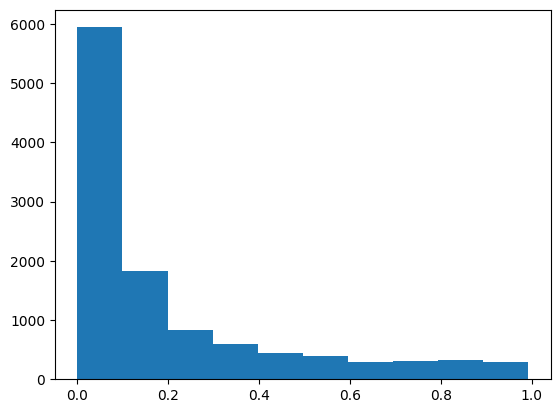

In [ ]:
train_probs = model.predict_proba(X_train)
train_probs
plt.hist(train_probs[:,1])

In [ ]:
train_targets.value_counts(normalize=True)

,proportion
Exited,
0.0,0.796533
1.0,0.203467


6. Виведу Confusion matrix, ROC Curve, метрику AUROC та метрику F1 Score для порога класифікації 0.5 для побудованої моделі на тренувальних та валідаційних даних.

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [ ]:
accuracy_score(train_targets, train_preds)

0.8747555555555555

In [ ]:
confusion_matrix(train_targets, train_preds)

array([[8600,  361],
       [1048, 1241]])

In [ ]:
from sklearn.metrics import roc_curve, auc

def compute_auroc_and_build_roc(inputs, targets, name=''):
  # Predict probabilities
  y_pred_proba = model.predict_proba(inputs)[:, 1]

  # Compute ROC curve
  fpr, tpr, thresholds = roc_curve(targets, y_pred_proba, pos_label=1.0)

    # Compute AUROC
  roc_auc = auc(fpr, tpr)
  print(f'AUROC for {name}: {roc_auc:.4f}')

  # Plot the ROC curve
  plt.figure()
  plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title(f'Receiver Operating Characteristic (ROC) Curve for {name}')
  plt.legend(loc="lower right")
  plt.show()

AUROC for Training: 0.8826


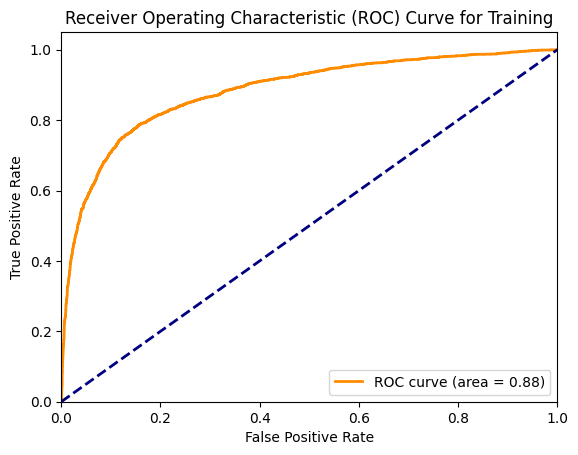

AUROC for Val: 0.8799


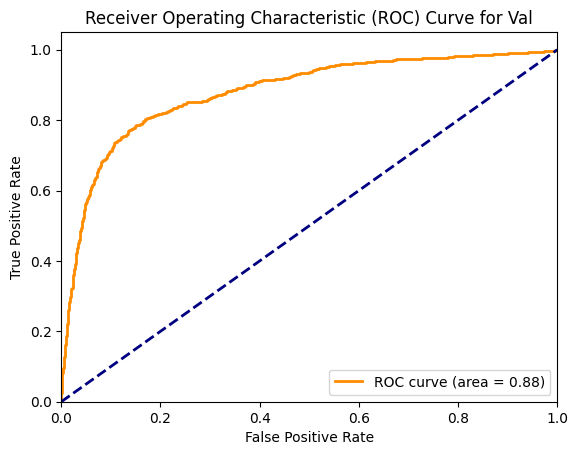

In [ ]:
compute_auroc_and_build_roc(X_train, train_targets, 'Training')
compute_auroc_and_build_roc(X_val, val_targets, 'Val')

In [ ]:
from sklearn.metrics import f1_score

In [ ]:
preds = model.predict(X_train)
preds[:5], train_targets[:5]

(array([0., 0., 0., 0., 0.]),
 8263     0.0
 14199    1.0
 1856     0.0
 3013     0.0
 8266     0.0
 Name: Exited, dtype: float64)

In [ ]:
f1_score(train_targets, preds, pos_label=1.0)

0.6378822924698021

7. Створюю передбачення моделі, яка передбачає завжди мажоритарний клас (той, якого більше в тренувальних даних). Порахую Accuracy на тренувальних та валідаційних даних для цієї моделі і тої, що я натренував в п.5.

In [ ]:
def all_zero(inputs):
    return np.full(len(inputs), 0.0)

In [ ]:
all_zero = all_zero(X_train)

all_zero

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
train_targets

,Exited
8263,0.0
14199,1.0
1856,0.0
3013,0.0
8266,0.0
...,...
9493,0.0
7687,1.0
8143,0.0
11512,0.0


In [ ]:
accuracy_score(train_targets, all_zero)

0.7965333333333333

Якість створеної моделі точно краща ніж втупу вибрати переважаюче значення таргета, яке має досить велике значення 0.7965.
Модель передбачає значення із точністю **0.88** по AUROC для тренувальних та валідаційних даних.

8. Ця функція робить підготовку нових даних (масштабування числових колонок і кодування категоріальних) і виводить ймовірності належності до класу 1 для кожного рядка в наданому наборі.

In [ ]:
import warnings
warnings.filterwarnings("ignore")

def predict_raw_df(scaler, encoder, numeric_cols, categorical_cols, input_df: pd.DataFrame):
    input_df[numeric_cols] = scaler.transform(input_df[numeric_cols])
    input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
    X_input = input_df[numeric_cols + encoded_cols]
    prob = model.predict_proba(X_input)[:,1]
    return prob

9. Зчитую дані з `test.csv` в змінну `test_raw_df`. Роблю передбачення для кожного рядка даних з функцією з попереднього завдання і записую результат в нову колонку `Exited` в датафреймі `test_raw_df`.

In [ ]:
test_raw_df = pd.read_csv('test.csv')
test_raw_df[:1]

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,15000,15594796.0,Chu,584.0,Germany,Male,30.0,2.0,146053.66,1.0,1.0,1.0,157891.86


In [ ]:
#predict_raw_df(scaler, encoder, numeric_cols, categorical_cols, test_raw_df)

In [ ]:
prob = predict_raw_df(scaler, encoder, numeric_cols, categorical_cols, test_raw_df)

prob

array([0.07494963, 0.03476697, 0.15096065, ..., 0.01850099, 0.15231631,
       0.09173931])

In [ ]:
test_raw_df['Exited'] = prob

In [ ]:
test_raw_df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain,Gender_Female,Gender_Male,Exited
0,15000,15594796.0,Chu,0.365155,Germany,Male,0.222222,0.2,0.696265,0.000000,1.0,1.0,0.789477,0.0,1.0,0.0,0.0,1.0,0.074950
1,15001,15642821.0,Mazzi,0.286396,France,Male,0.388889,0.5,0.000000,0.333333,1.0,1.0,0.337131,1.0,0.0,0.0,0.0,1.0,0.034767
2,15002,15716284.0,Onyekachi,0.656325,France,Male,0.462963,0.8,0.000000,0.333333,1.0,0.0,0.783859,1.0,0.0,0.0,0.0,1.0,0.150961
3,15003,15785078.0,Martin,0.682578,Spain,Male,0.500000,0.3,0.000000,0.000000,1.0,1.0,0.834571,0.0,0.0,1.0,0.0,1.0,0.196458
4,15004,15662955.0,Kenechukwu,0.384248,Spain,Male,0.462963,0.8,0.000000,0.333333,1.0,1.0,0.718421,0.0,0.0,1.0,0.0,1.0,0.055247


In [ ]:
prob.shape

(10000,)

10. Зчитую файл 'sample_submission.csv' і зповнюю колонку `Exited` передбаченими моделлю значеннями для кожного відповідного `id` клієнта.Зберігаю результат в файл `submission_log_reg.csv`.

Це було виконано для того щоб завантажити результат на Kaggle для змагання. результат змагання на цьому етапі прикріплю нижче.

In [ ]:
submission = pd.read_csv('sample_submission.csv')

submission[:5]

,id,Exited
0,15000,0.5
1,15001,0.5
2,15002,0.5
3,15003,0.5
4,15004,0.5


In [ ]:
submission.shape

(10000, 2)

In [ ]:
submission.set_index('id', inplace=True)
test_raw_df.set_index('id', inplace=True)

In [ ]:
submission.update(test_raw_df[['Exited']])

submission.reset_index(inplace=True)
test_raw_df.reset_index(inplace=True)


submission[:5]

,id,Exited
0,15000,0.074950
1,15001,0.034767
2,15002,0.150961
3,15003,0.196458
4,15004,0.055247


In [ ]:
submission.to_csv('submission_log_reg.csv', index=False)

In [ ]:
submission.describe()

,id,Exited
count,10000.00000,10000.000000
mean,19999.50000,0.212722
std,2886.89568,0.255538
min,15000.00000,0.000688
25%,17499.75000,0.034802
50%,19999.50000,0.094728
75%,22499.25000,0.285268
max,24999.00000,0.993969


Ось така оцінка вийшла на тестових даних.

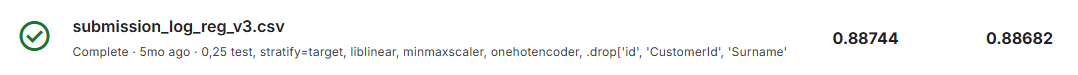